In [34]:
import ete3  # phylogenetic data manipulating library
from matplotlib import pyplot as plt # plotting tool
import re # regexx package
import numpy as np # numeric library, good for vectors and very efficient

In [13]:
#
# random tree!
yeah = ete3.Tree()
yeah.populate(10, names_library=list('abcdefegij'), random_branches=True)
print yeah


      /-e
   /-|
  |  |   /-d
  |   \-|
  |      \-c
--|
  |      /-b
  |   /-|
  |  |   \-a
   \-|
     |   /-j
      \-|
        |   /-i
         \-|
           |   /-g
            \-|
              |   /-e
               \-|
                  \-f


In [98]:
tree = ete3.Tree('(((a:0.3,b:0.2)90:0.1,c:0.8)65,(d:0.12,e:0.3)80:0.1)100;')
print tree


         /-a
      /-|
   /-|   \-b
  |  |
--|   \-c
  |
  |   /-d
   \-|
      \-e


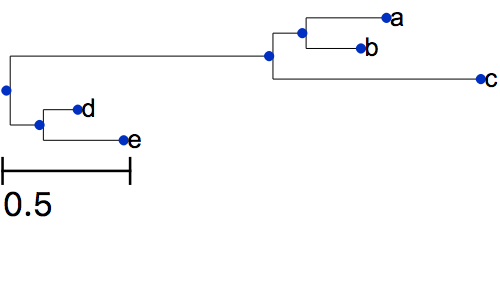

In [14]:
tree.render(file_name='%%inline', w=500)

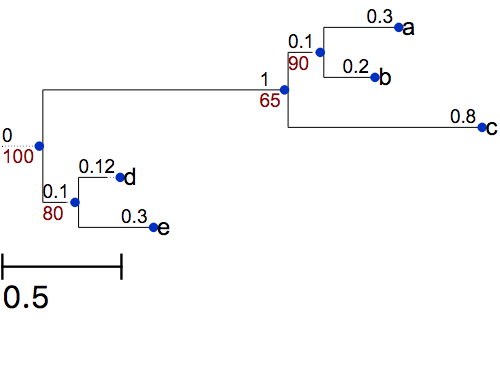

In [15]:
tree_style                     = ete3.TreeStyle()
tree_style.show_branch_length  = True
tree_style.show_branch_support = True
tree.render(file_name='%%inline', w=500, tree_style=tree_style)

In [24]:
def yeah(num):
    return num**2

for n in range(10):
    print yeah(n)
range(10)

0
1
4
9
16
25
36
49
64
81


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
me = tree.get_leaves_by_name('a')[0]
print me.features
me.support

set(['_nid', 'support', 'dist', 'name', 'member_name'])


1.0

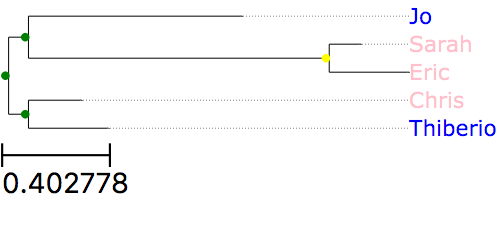

In [111]:
leaf_names   = dict(a='Thiberio', b='Chris', c='Jo', d='Sarah', e='Eric')

postdocs     = 'Thiberio Jo'.split()
gradstudents = 'Sarah Eric Chris'.split()

pd_face   = ete3.AttrFace("member_name", fsize=10, fgcolor='blue')
grad_face = ete3.AttrFace("member_name", fsize=10, fgcolor='pink')
def customLayout(node):
    if node.is_leaf():
        node.img_style['size'] = 0
        node.add_feature('member_name', leaf_names[node.name])
        if node.member_name in postdocs:
            ete3.add_face_to_node(pd_face, node, 2, aligned=True)
        else:
            ete3.add_face_to_node(grad_face, node, 2, aligned=True)
    else:
        if node.support >= 90:
            node.img_style['fgcolor'] = 'green'
        elif node.support >= 70:
            node.img_style['fgcolor'] = 'yellow'
        else:
            node.img_style['fgcolor'] = 'red'

tree_style                     = ete3.TreeStyle()
tree_style.layout_fn           = customLayout
tree_style.show_leaf_name      = False
tree_style.draw_guiding_lines  = True
tree_style.show_branch_support = False
tree_style.show_branch_length  = False
tree.render(file_name='%%inline', w=500, tree_style=tree_style)

In [69]:
matrix = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7
a\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58
b\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12
c\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36
d\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93
e\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65
"""
print("Example numerical matrix")
print(matrix)

Example numerical matrix

#Names	col1	col2	col3	col4	col5	col6	col7
a	-1.23	-0.81	1.79	0.78	-0.42	-0.69	0.58
b	-1.76	-0.94	1.16	0.36	0.41	-0.35	1.12
c	-2.19	0.13	0.65	-0.51	0.52	1.04	0.36
d	-1.22	-0.98	0.79	-0.76	-0.29	1.54	0.93
e	-1.47	-0.83	0.85	0.07	-0.81	1.53	0.65



In [70]:
tree = ete3.ClusterTree('(((a:0.3,b:0.2)90:0.1,c:0.8)65,(d:0.12,e:0.3)80:0.1)100;', text_array=matrix)
print tree


         /-a
      /-|
   /-|   \-b
  |  |
--|   \-c
  |
  |   /-d
   \-|
      \-e


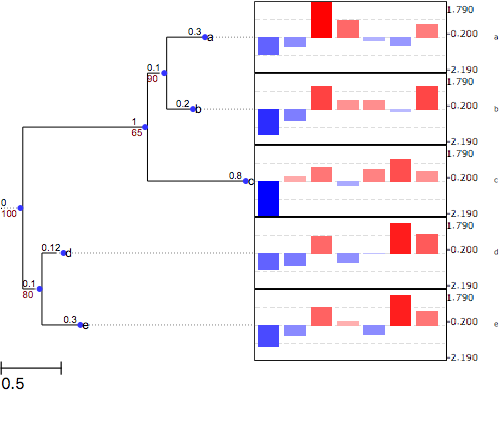

In [71]:
tree_style                     = ete3.TreeStyle()
tree_style.show_branch_length  = True
tree_style.show_branch_support = True
tree_style.draw_guiding_lines  = True
tree_style.layout_fn           = 'cluster_cbars'
tree.render(file_name='%%inline', w=500, tree_style=tree_style)

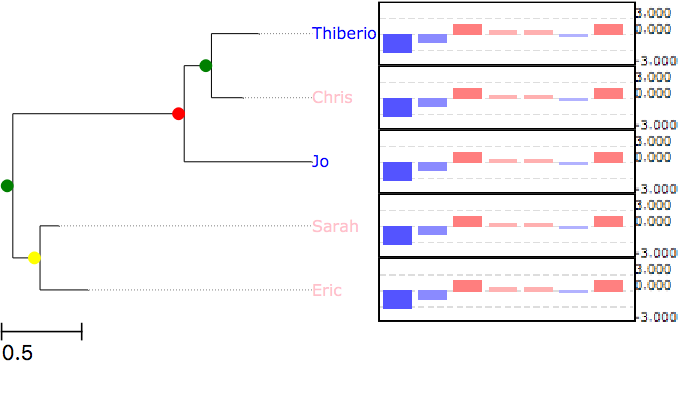

In [72]:
mapping = ete3.ProfileFace(3, -3, 0, style="cbars")
def customLayout(node):
    if node.is_leaf():
        node.img_style['size'] = 0
        node.add_feature('member_name', leaf_names[node.name])
        ete3.add_face_to_node(mapping, node, 2, aligned=True)
        if node.member_name in postdocs:
            ete3.add_face_to_node(pd_face, node, 1, aligned=True)
        else:
            ete3.add_face_to_node(grad_face, node, 1, aligned=True)
    else:
        node.img_style['size'] = 7
        if node.support >= 90:
            node.img_style['fgcolor'] = 'green'
        elif node.support >= 70:
            node.img_style['fgcolor'] = 'yellow'
        else:
            node.img_style['fgcolor'] = 'red'

tree_style.layout_fn           = customLayout
tree_style.show_leaf_name      = False
tree_style.draw_guiding_lines  = True
tree_style.show_branch_support = False
tree_style.show_branch_length  = False
tree.render(file_name='%%inline', w=700, tree_style=tree_style)

In [73]:
presence_absence = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7\tcol8\tcol9\tcol10\tcol11\tcol12\tcol13\tcol14
a\t1\t0\t1\t0\t0\t0\t0\t1\t1\t1\t0\t0\t0\t0
b\t1\t0\t1\t0\t0\t0\t1\t1\t1\t1\t0\t0\t0\t1
c\t1\t1\t0\t0\t0\t1\t0\t1\t1\t0\t0\t0\t1\t0
d\t0\t0\t0\t0\t1\t1\t0\t0\t1\t0\t0\t1\t1\t0
e\t1\t0\t0\t0\t1\t1\t0\t0\t1\t0\t1\t1\t1\t0
"""
tree = ete3.ClusterTree('(((a:0.3,b:0.2)90:0.1,c:0.8)65,(d:0.12,e:0.3)80:0.1)100;', presence_absence)
print("Example boolean matrix")
print(presence_absence)

Example boolean matrix

#Names	col1	col2	col3	col4	col5	col6	col7	col8	col9	col10	col11	col12	col13	col14
a	1	0	1	0	0	0	0	1	1	1	0	0	0	0
b	1	0	1	0	0	0	1	1	1	1	0	0	0	1
c	1	1	0	0	0	1	0	1	1	0	0	0	1	0
d	0	0	0	0	1	1	0	0	1	0	0	1	1	0
e	1	0	0	0	1	1	0	0	1	0	1	1	1	0



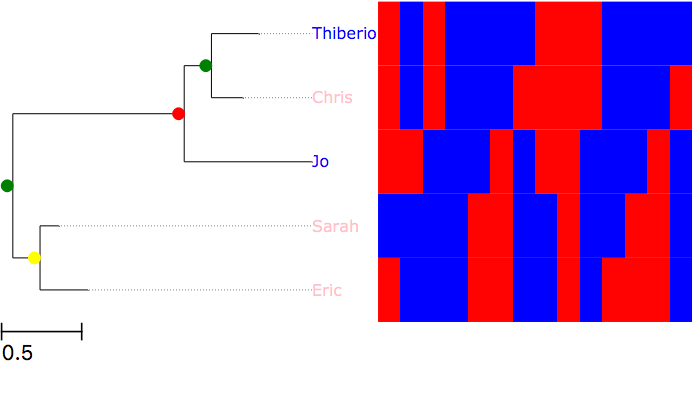

In [74]:
def customLayout(node):
    mapping = ete3.ProfileFace(1, 0.01, 0.5, style="heatmap", colorscheme=2)
    if node.is_leaf():
        node.img_style['size'] = 0
        node.add_feature('member_name', leaf_names[node.name])
        if node.member_name in postdocs:
            ete3.add_face_to_node(pd_face, node, 1, aligned=True)
        else:
            ete3.add_face_to_node(grad_face, node, 1, aligned=True)
        ete3.add_face_to_node(mapping, node, 2, aligned=True)
    else:
        node.img_style['size'] = 7
        if node.support >= 90:
            node.img_style['fgcolor'] = 'green'
        elif node.support >= 70:
            node.img_style['fgcolor'] = 'yellow'
        else:
            node.img_style['fgcolor'] = 'red'

del(tree_style)
tree_style                     = ete3.TreeStyle()
tree_style.layout_fn           = customLayout
tree_style.show_leaf_name      = False
tree_style.draw_guiding_lines  = True
tree_style.show_branch_support = False
tree_style.show_branch_length  = False
tree.render(file_name='%%inline', w=700, tree_style=tree_style, dpi=300)

In [75]:
def get_color_gradient(self):
    from PyQt5 import QtGui
    import matplotlib.colors as colors
    import matplotlib.cm as cmx

    cNorm  = colors.Normalize(vmin=0, vmax=1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap(self.colorscheme))
    color_scale = []
    for scale in np.linspace(0, 1, 201):
        hex_color = '#%02x%02x%02x' %scalarMap.to_rgba(scale)[:3]
        [r,g,b,a] = scalarMap.to_rgba(scale, bytes=True)
        color_scale.append( QtGui.QColor( r, g, b, a ) )

    return color_scale

ete3.ProfileFace.get_color_gradient = get_color_gradient

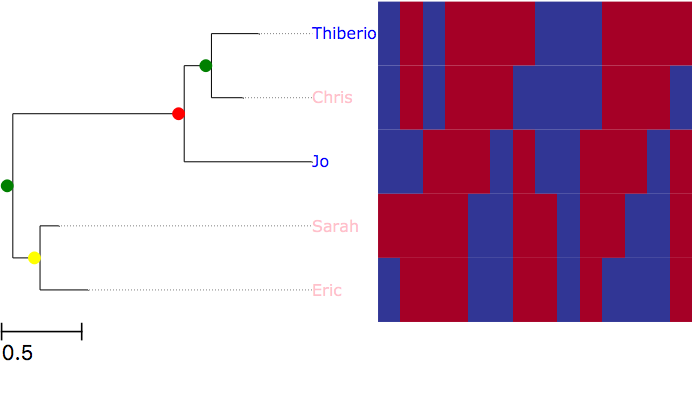

In [79]:
def customLayout(node):
    mapping = ete3.ProfileFace(1, 0.1, 0.5, style="heatmap", colorscheme='RdYlBu')
    if node.is_leaf():
        node.img_style['size'] = 0
        node.add_feature('member_name', leaf_names[node.name])
        if node.member_name in postdocs:
            ete3.add_face_to_node(pd_face, node, 1, aligned=True)
        else:
            ete3.add_face_to_node(grad_face, node, 1, aligned=True)
        ete3.add_face_to_node(mapping, node, 2, aligned=True)
    else:
        node.img_style['size'] = 7
        if node.support >= 90:
            node.img_style['fgcolor'] = 'green'
        elif node.support >= 70:
            node.img_style['fgcolor'] = 'yellow'
        else:
            node.img_style['fgcolor'] = 'red'

del(tree_style)
tree_style                     = ete3.TreeStyle()
tree_style.layout_fn           = customLayout
tree_style.show_leaf_name      = False
tree_style.draw_guiding_lines  = True
tree_style.show_branch_support = False
tree_style.show_branch_length  = False
tree.render(file_name='%%inline', w=700, tree_style=tree_style, dpi=300)

In [99]:
tree.set_outgroup('a')
print tree


   /-a
--|
  |   /-b
   \-|
     |   /-c
      \-|
        |   /-d
         \-|
            \-e


In [100]:
new_og = tree.get_common_ancestor('d e'.split())
tree.set_outgroup(new_og)
print tree


      /-d
   /-|
  |   \-e
--|
  |   /-c
   \-|
     |   /-b
      \-|
         \-a


In [102]:
tree.set_outgroup('a')
new_new_og = tree.get_common_ancestor('d e c'.split())
tree.set_outgroup(new_new_og)
print tree


      /-c
   /-|
  |  |   /-d
  |   \-|
--|      \-e
  |
  |   /-b
   \-|
      \-a


In [115]:
tree.check_monophyly('a c'.split(), target_attr='name', unrooted=True)

(False, 'polyphyletic', {Tree node 'b' (0x12799129)})

In [121]:
for node in tree.traverse():
    if node.is_leaf():
        print node.name
    else:
        print node.support

100.0
90.0
90.0
c
80.0
b
a
d
e


In [123]:
hell = ete3.Tree()
yeah = ete3.Tree()

hell.populate(10)
yeah.populate(10)

print hell
print yeah


         /-aaaaaaaaac
      /-|
     |   \-aaaaaaaaad
   /-|
  |  |   /-aaaaaaaaae
  |   \-|
  |      \-aaaaaaaaaf
  |
--|      /-aaaaaaaaag
  |   /-|
  |  |  |   /-aaaaaaaaah
  |  |   \-|
  |  |     |   /-aaaaaaaaai
   \-|      \-|
     |         \-aaaaaaaaaj
     |
     |   /-aaaaaaaaaa
      \-|
         \-aaaaaaaaab

         /-aaaaaaaaac
      /-|
     |   \-aaaaaaaaad
     |
   /-|      /-aaaaaaaaae
  |  |   /-|
  |  |  |   \-aaaaaaaaaf
  |   \-|
  |     |   /-aaaaaaaaag
--|      \-|
  |         \-aaaaaaaaah
  |
  |      /-aaaaaaaaai
  |   /-|
  |  |   \-aaaaaaaaaj
   \-|
     |   /-aaaaaaaaaa
      \-|
         \-aaaaaaaaab


In [124]:
hell.robinson_foulds(yeah)

[8,
 16,
 {'aaaaaaaaaa',
  'aaaaaaaaab',
  'aaaaaaaaac',
  'aaaaaaaaad',
  'aaaaaaaaae',
  'aaaaaaaaaf',
  'aaaaaaaaag',
  'aaaaaaaaah',
  'aaaaaaaaai',
  'aaaaaaaaaj'},
 {('aaaaaaaaaa',),
  ('aaaaaaaaaa', 'aaaaaaaaab'),
  ('aaaaaaaaaa',
   'aaaaaaaaab',
   'aaaaaaaaac',
   'aaaaaaaaad',
   'aaaaaaaaae',
   'aaaaaaaaaf',
   'aaaaaaaaag',
   'aaaaaaaaah',
   'aaaaaaaaai',
   'aaaaaaaaaj'),
  ('aaaaaaaaaa',
   'aaaaaaaaab',
   'aaaaaaaaag',
   'aaaaaaaaah',
   'aaaaaaaaai',
   'aaaaaaaaaj'),
  ('aaaaaaaaab',),
  ('aaaaaaaaac',),
  ('aaaaaaaaac', 'aaaaaaaaad'),
  ('aaaaaaaaac', 'aaaaaaaaad', 'aaaaaaaaae', 'aaaaaaaaaf'),
  ('aaaaaaaaad',),
  ('aaaaaaaaae',),
  ('aaaaaaaaae', 'aaaaaaaaaf'),
  ('aaaaaaaaaf',),
  ('aaaaaaaaag',),
  ('aaaaaaaaag', 'aaaaaaaaah', 'aaaaaaaaai', 'aaaaaaaaaj'),
  ('aaaaaaaaah',),
  ('aaaaaaaaah', 'aaaaaaaaai', 'aaaaaaaaaj'),
  ('aaaaaaaaai',),
  ('aaaaaaaaai', 'aaaaaaaaaj'),
  ('aaaaaaaaaj',)},
 {('aaaaaaaaaa',),
  ('aaaaaaaaaa', 'aaaaaaaaab'),
  ('aaaaaaaaaa',
   